<a href="https://colab.research.google.com/github/appersaravanan/Semeter-2-Assignment-1/blob/master/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split,KFold
import matplotlib.pyplot as plt
from math import ceil, floor


In [2]:
def show_imgs(images):
    fig, axs = plt.subplots(4, 4)
    cnt = 0
    for i in range(4):
        for j in range(4):
            axs[i,j].imshow(images[cnt])
            axs[i,j].axis('off')
            cnt += 1
    
    
    plt.show()

#Load cifar10 dataset

In [3]:

(x_train,y_train),(x_test,y_test) =cifar10.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)



170500096/170498071 [==============================] - 4s 0us/step
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


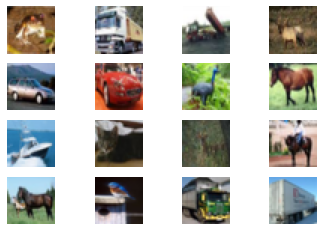

In [4]:
show_imgs(x_train)

# Normalization


In [5]:
batch_size=128
print(x_train.min() , x_train.max())
x_train = x_train- x_train.min() / x_train.max()- x_train.min()
x_train =x_train/255
print(x_train.min() , x_train.max())



0 255
0.0 1.0


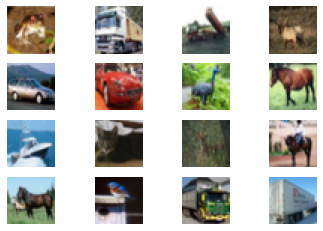

In [13]:
show_imgs(x_train)

In [6]:
x_train_split, x_vald_split,y_train_split,y_vald_split= train_test_split(x_train,y_train, train_size=0.7, test_size=0.3)

print(x_train_split.shape)
print(y_train_split.shape)
print(x_vald_split.shape)
print(y_vald_split.shape)


(35000, 32, 32, 3)
(35000, 1)
(15000, 32, 32, 3)
(15000, 1)


In [8]:
ks= KFold(n_splits=10)
ks.split(x_train)

for train_index, test_index in ks.split(x_train):
  print("TRAIN:", train_index, "TEST:", test_index)

TRAIN: [ 5000  5001  5002 ... 49997 49998 49999] TEST: [   0    1    2 ... 4997 4998 4999]
TRAIN: [    0     1     2 ... 49997 49998 49999] TEST: [5000 5001 5002 ... 9997 9998 9999]
TRAIN: [    0     1     2 ... 49997 49998 49999] TEST: [10000 10001 10002 ... 14997 14998 14999]
TRAIN: [    0     1     2 ... 49997 49998 49999] TEST: [15000 15001 15002 ... 19997 19998 19999]
TRAIN: [    0     1     2 ... 49997 49998 49999] TEST: [20000 20001 20002 ... 24997 24998 24999]
TRAIN: [    0     1     2 ... 49997 49998 49999] TEST: [25000 25001 25002 ... 29997 29998 29999]
TRAIN: [    0     1     2 ... 49997 49998 49999] TEST: [30000 30001 30002 ... 34997 34998 34999]
TRAIN: [    0     1     2 ... 49997 49998 49999] TEST: [35000 35001 35002 ... 39997 39998 39999]
TRAIN: [    0     1     2 ... 49997 49998 49999] TEST: [40000 40001 40002 ... 44997 44998 44999]
TRAIN: [    0     1     2 ... 44997 44998 44999] TEST: [45000 45001 45002 ... 49997 49998 49999]


##Hold-out defination

In [ ]:
def hold_out(ds,labels, train_ds_size,vald_ds_size):
  if ds is None:
      raise ValueError("ds can't be empty")
  print(len(ds))
  train_count=ceil(train_ds_size* len(ds))

  valid_count=ceil(vald_ds_size* len(ds))
  # print(train_count)
  # print(valid_count)
  # print(ds[:train_count].shape)
  # print(ds[train_count:(train_count+valid_count)].shape)
  return ds[:train_count],ds[train_count:(train_count+valid_count)],labels[:train_count],labels[train_count:(train_count+valid_count)]

In [ ]:
x_train_split, x_vald_split,y_train_split,y_vald_split= hold_out(x_train,y_train,0.7,0.3)
x_train_split
print(x_train_split.shape)
print(y_train_split.shape)
print(x_vald_split.shape)
print(y_vald_split.shape)


50000
(35000, 32, 32, 3)
(35000, 1)
(15000, 32, 32, 3)
(15000, 1)


In [ ]:

def train(epochs, batch_size=128, save_interval=50):
    alter=0;
    for epoch in range(epochs):
        half_batch = 64 #np.random.randint(in_batch_size, x_train.shape[0]/60)
        idx = np.random.randint(0, x_train.shape[0], half_batch)
        imgs = x_train[idx] 

        noise = np.random.normal(0, 1, (half_batch, 100))
        gen_imgs = generator.predict(noise)
        
        real_1_labels,fake_0_lables =np.ones((half_batch, 1)),np.zeros((half_batch, 1) )

        real_1_labels_9 = real_1_labels * 0.9
        
        discriminator.trainable=True
       
        d_loss_real,d_acc_real = discriminator.train_on_batch(imgs, real_1_labels_9)
        d_loss_fake,d_acc_fake = discriminator.train_on_batch(gen_imgs, fake_0_lables )
        d_loss = np.add(d_loss_real, d_loss_fake) *0.5
        d_acc = np.add(d_acc_real, d_acc_fake) *0.5
        # print(""+str(d_loss_real) +"="+ str(d_loss_fake)+ "= "+str(d_loss))
        noise = np.random.normal(0, 1, (batch_size, 100)) 
        valid_y = np.array([1] * batch_size) 
        discriminator.trainable=False
        g_loss ,g_acc= combined.train_on_batch(noise, valid_y)

        #graph data
        d_loss_real_list.append(d_loss_real)
        d_loss_fake_list.append(d_loss_fake)
        d_acc_real_list.append(d_acc_real)
        d_acc_fake_list.append(d_acc_fake)
        g_loss_list.append(g_loss)
        d_loss_list.append(d_loss)
       
        if epoch % save_interval == 0 or (epoch == epochs or  epoch == epochs-1) :
            print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss, 100*d_acc, g_loss))
            show_imgs(epoch)





Method to display images that are generatored by generator during the traning at certain epochs

In [ ]:
image_array=[]
def show_imgs(epoch):
    
    noise = np.random.normal(0, 1, (16, 100))
    gen_imgs = generator.predict(noise)

    # Rescale images 0 - 1
    gen_imgs = 0.5 * gen_imgs + 0.5
   
    fig, axs = plt.subplots(4, 4)
    cnt = 0
    for i in range(4):
        for j in range(4):
            axs[i,j].imshow(gen_imgs[cnt, :,:,0], cmap='gray')
            axs[i,j].axis('off')
            cnt += 1
    
    
    plt.show()

In [ ]:
g_optimizer = Adam(0.0001,0.5) 
d_optimizer = Adam(0.001) 

Complie the only Discriminator and the GAN. We don't need a compliation config 
for generator because it is covered as part of GAN

In [ ]:
discriminator = def_discriminator()

discriminator.compile(loss='binary_crossentropy',optimizer=d_optimizer,metrics=['accuracy'])
generator = def_generator()
z = Input(shape=(100,))  
img = generator(z)
valid = discriminator(img) 

combined = Model(z, valid)
combined.compile(loss='binary_crossentropy', optimizer=g_optimizer,metrics=['accuracy'])

train(epochs=20000, batch_size=in_batch_size, save_interval=1000)

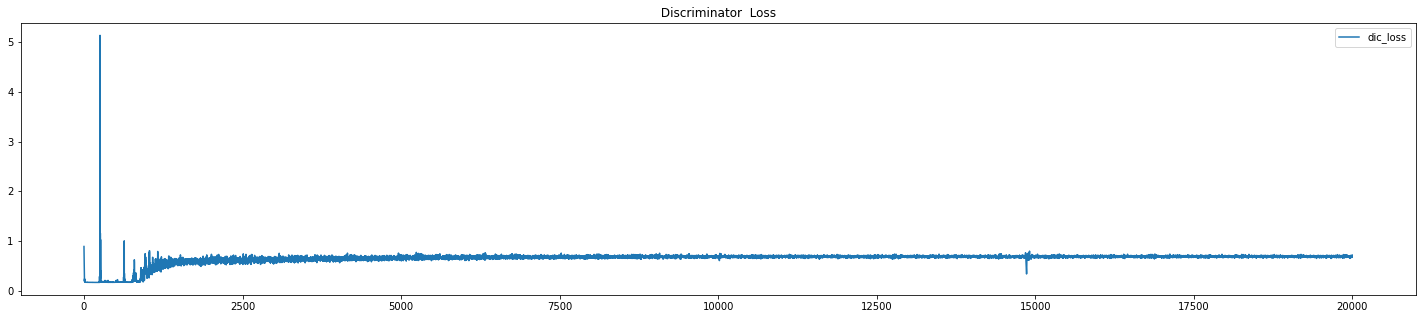

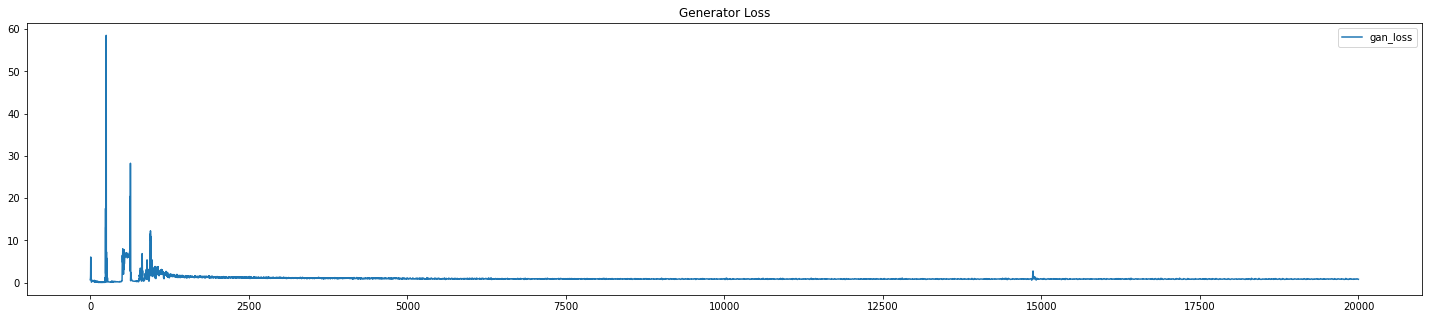

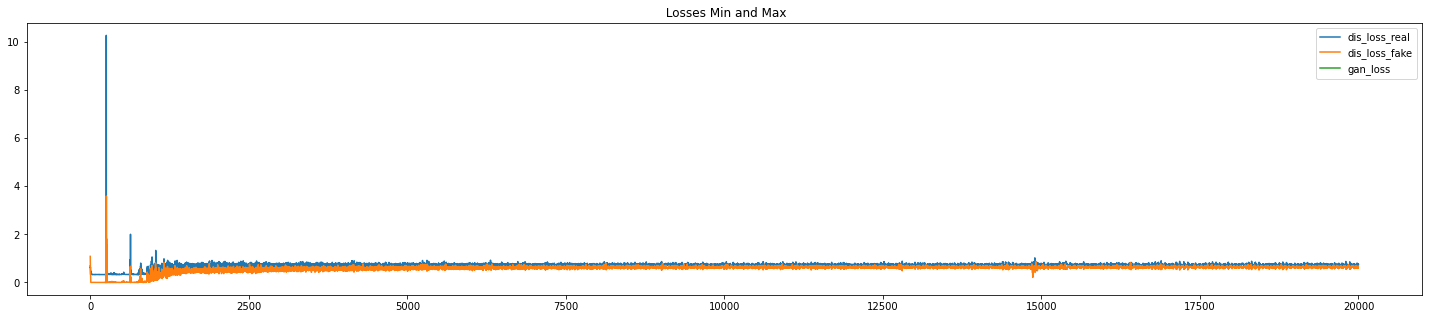

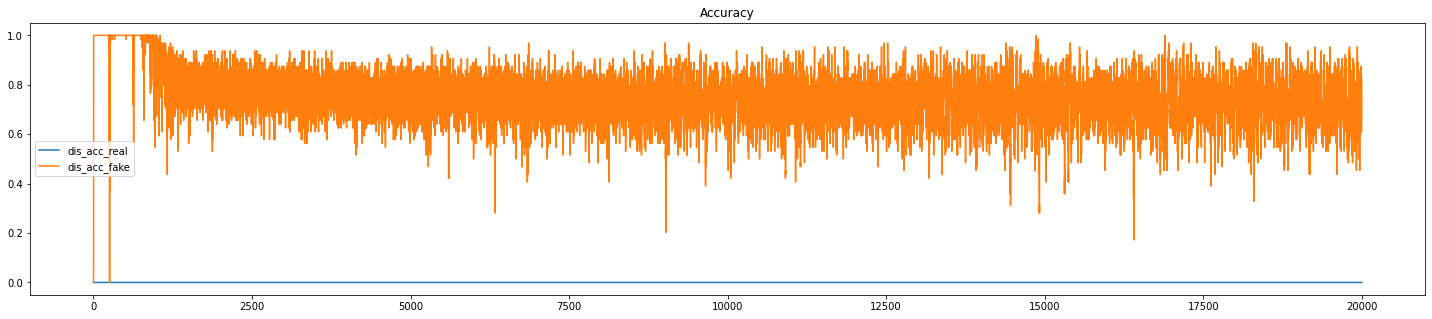

In [ ]:

plt.subplots(figsize=(25, 5))

plt.plot(d_loss_list, label='dic_loss')
plt.title(" Discriminator  Loss ")
plt.legend()

plt.subplots(figsize=(25, 5))
plt.plot(g_loss_list, label='gan_loss')
plt.title("Generator Loss")
plt.legend()


plt.subplots(figsize=(25, 5))
plt.plot(d_loss_real_list, label='dis_loss_real')
plt.plot(d_loss_fake_list, label='dis_loss_fake')
plt.plot(g_loss_list[0], label='gan_loss')

plt.title(" Losses Min and Max")
plt.legend()


fig, ax = plt.subplots(figsize=(25, 5))
plt.plot(d_acc_real_list, label='dis_acc_real')
plt.plot(d_acc_fake_list, label='dis_acc_fake')


plt.title("Accuracy")
plt.legend()


(28, 28)
[[0.4984796]]


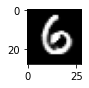

In [ ]:
plt.subplots(figsize=(1, 1))
gen_imgs =  generator(np.random.randn(1,100)) 
pred_input= tf.reshape(gen_imgs,(28,28))
plt.imshow(pred_input,cmap="gray")
print(pred_input.shape)
pred_input= tf.reshape(pred_input,(1,28,28,1))
print(discriminator.predict(pred_input))